
# ML Project - Dataset 2 - Gold

## Introduction

This notebook addresses a regression task using a financial dataset. It includes:
- Dataset exploration
- Data preprocessing
- Feature extraction/engineering
- Implementation of two regression models
- Comparative analysis
- Ethical considerations
- References



## 1. Dataset Exploration

### Overview
We explore the financial dataset to understand:
- The number of samples and features
- Missing values (if any)
- Distribution of variables
- Potential categorical variables

### Code and Analysis


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null 

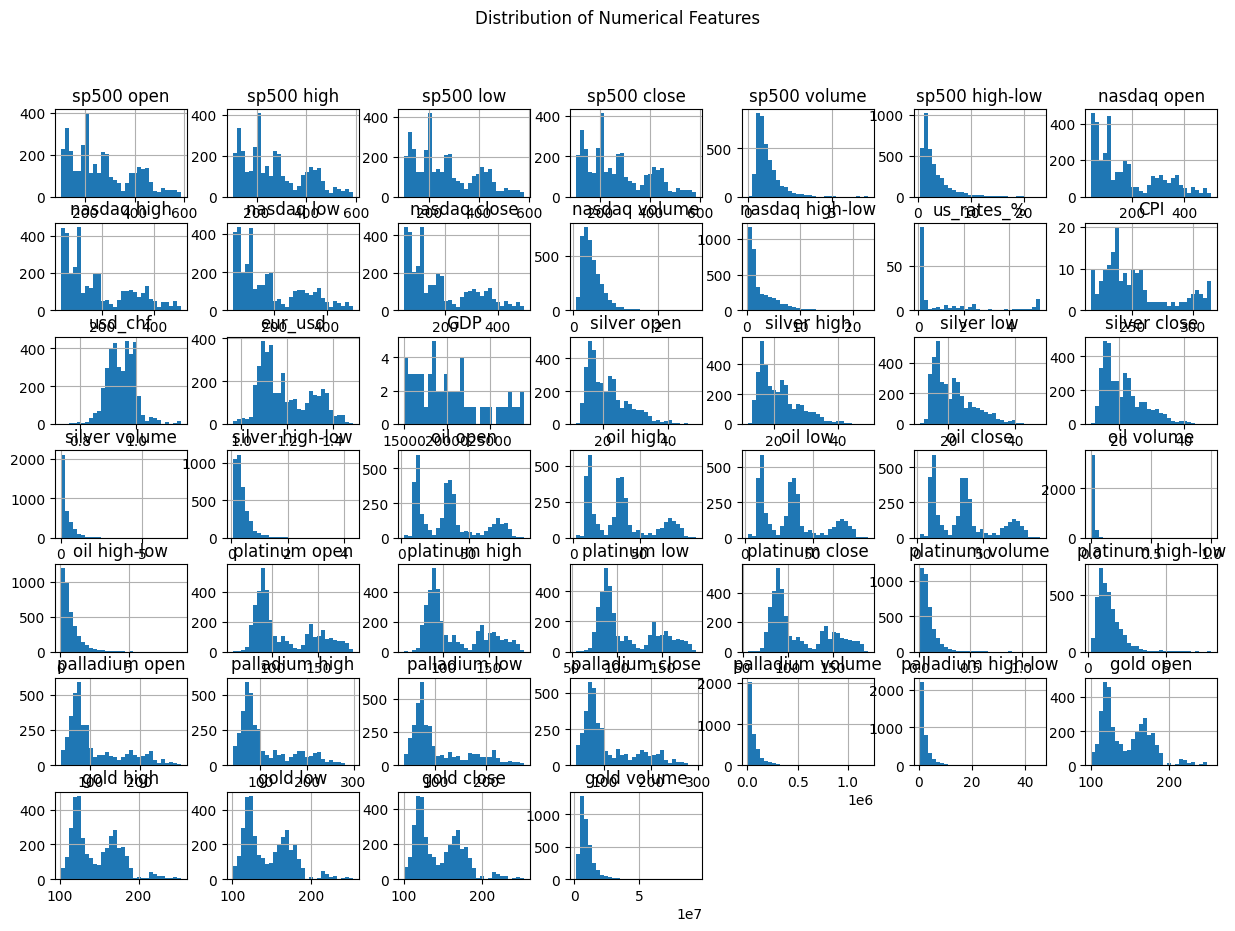

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'financial_regression.csv'
data = pd.read_csv(data_path)

# Basic information about the dataset
print("Dataset Information:")
data.info()

# Display the first few rows
print("First 5 Rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Feature:")
print(missing_values)

# Plot distributions of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()



## 2. Data Preprocessing

### Overview
We preprocess the dataset based on insights from the exploration phase. This includes handling missing values, scaling, and encoding.

### Code and Justifications


In [23]:
# Handling missing values
# Fill missing numerical values with the median
numeric_features = data.select_dtypes(include=['number']).columns
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

# Encoding categorical variables, if any
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    data[col] = data[col].fillna('Unknown')  # Replace missing categorical values with 'Unknown'
    data[col] = pd.factorize(data[col])[0]  # Encode categorical variables as integers

# Standardizing numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Verify preprocessing
print("Data after preprocessing:")
print(data.head())

Data after preprocessing:
       date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0 -1.731607   -1.289598   -1.289151  -1.284338    -1.285765      0.061855   
1 -1.730720   -1.287574   -1.291667  -1.294686    -1.296641      1.493079   
2 -1.729833   -0.221321   -0.224505  -0.223870    -0.226227     -0.282564   
3 -1.728945   -1.296934   -1.289235  -1.291378    -1.284669      0.402972   
4 -1.728058   -1.291369   -1.294938  -1.296552    -1.294533      1.553493   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  palladium high  \
0       -0.868379    -1.110570    -1.110549   -1.108817  ...       -1.115175   
1       -0.514588    -1.108902    -1.110301   -1.113613  ...       -1.102264   
2       -0.341539    -0.339166    -0.341309   -0.336363  ...       -0.436847   
3       -0.553044    -1.113073    -1.109555   -1.111089  ...       -1.079235   
4       -0.579963    -1.110487    -1.109853   -1.115465  ...       -1.075222   

   palladium low  palladium cl

In [24]:
# Example: Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA

# Select numerical features for PCA
pca = PCA(n_components=5)  # Reduce to 5 components
pca_features = pca.fit_transform(data[numerical_features])

# Create a new DataFrame for PCA features
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(5)])
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Merge PCA features back into the dataset
data = pd.concat([data, pca_df], axis=1)

Explained Variance Ratio for each component:
[0.40611414 0.22844018 0.077314   0.0516524  0.0453335 ]



## 3. Feature Extraction/Engineering

### Overview
This step involves transforming the data to improve model performance. Depending on the dataset, this may include:
- Generating new features from existing ones
- Dimensionality reduction (e.g., PCA)

### Code and Justifications



## 4. Machine Learning Models

### Overview
We apply two regression models to predict the target variable. The models include:
1. Linear Regression
2. Random Forest Regression

### Code and Results


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the data into features (X) and target (y)
X = data.drop(columns=['gold close'])  # Replace with your selected target column
y = data['gold close']  # Replace with your selected target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Results
print(f"Linear Regression - RMSE: {lr_rmse}, MAE: {lr_mae}")
print(f"Random Forest Regression - RMSE: {rf_rmse}, MAE: {rf_mae}")

Linear Regression - RMSE: 3.844626479440218e-29, MAE: 4.816798457464569e-15
Random Forest Regression - RMSE: 0.0003379592413727618, MAE: 0.012275247302802115



## 5. Comparative Analysis

### Overview
We compare the two models based on:
- Accuracy and error metrics (e.g., RMSE, MAE)
- Computational complexity

### Code and Discussion

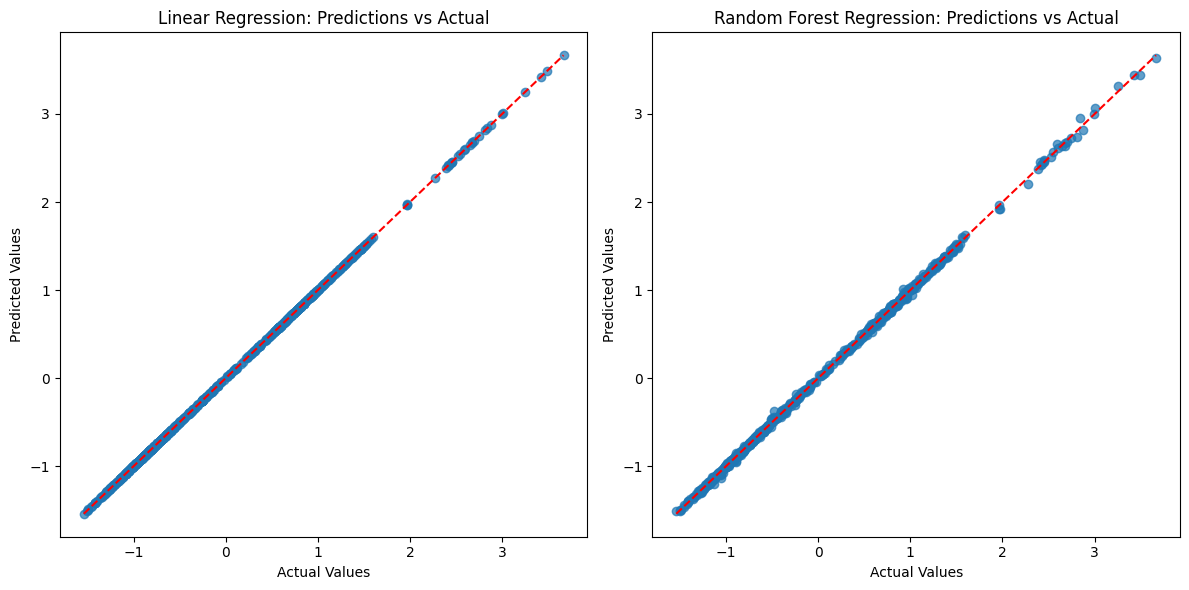

In [26]:
# Plotting predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Random Forest Regression: Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


## 6. Ethical Considerations

### Discussion
1. **Bias in Financial Predictions**:
   - If the dataset contains systemic biases, predictions could disproportionately favor or disfavor certain groups.
   - Example: Loan approvals based on incomplete or skewed historical data.

2. **Privacy Concerns**:
   - Financial datasets often include sensitive information. Proper anonymization and compliance with data protection laws (e.g., GDPR) are essential.

3. **Impact of Errors**:
   - Incorrect predictions could lead to financial losses or poor decision-making. Rigorous validation is critical.

4. **Transparency and Interpretability**:
   - Regression models should be interpretable to ensure stakeholders understand the basis for predictions.



## 7. References

### Bibliography
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- PCA Guide: https://builtin.com/data-science/step-step-explanation-principal-component-analysis
- Ethical AI Guidelines: https://ethicsinaction.ieee.org/
